**Q6 a) Find the Utilitarian social planner allocation**


**Solving Q6 a)**: The first step in the maximization problem is to define the utilitarian social utility function that consists of summing agents' A and B utilities- the aggregate utility. 

After that we need to solve the maximization problem using an optimizer like scipy.optimize.minimize to find the allocation that maximizes the aggregate utility. To do so, we need to deine the objective function, which in this case is the  negative of the aggregate_utility because scipy.optimize.minimize minimizes rather than maximizes.

Using this optimizer, we needed to start with an initial guess. In this case we decided to start with the "middle point", where A and B allocations of good 1 and 2 is 0.5. 

In [1]:

import numpy as np #REMOVE THIS WHEN PALCING IN THE GENERAL NOTEBOOK, AS IT HAS ALREADY BEEN DONE
from ExchangeEconomy import ExchangeEconomyClass #REMOVE THIS WHEN PALCING IN THE GENERAL NOTEBOOK, AS IT HAS ALREADY BEEN DONE
model = ExchangeEconomyClass() #REMOVE THIS WHEN PALCING IN THE GENERAL NOTEBOOK, AS IT HAS ALREADY BEEN DONE

# Defining the utilitarian aggregate utility function
def aggregate_utility(x):
    x1A, x2A = x
    x1B, x2B = 1 - x1A, 1 - x2A  # B's allocation is what remains from A's allocation
    utility_A = model.utility_A(x1A, x2A)
    utility_B = model.utility_B(x1B, x2B)
    return utility_A + utility_B

# Defining the objective function
def objective(x):
    return -aggregate_utility(x)

# Bounds for x1A and x2A- have to be between 0 and 1
bounds = [(0, 1), (0, 1)]

# Initial guess- a guess is needed to initialize the optmizer
initial_guess = [0.5, 0.5]

from scipy.optimize import minimize 

# Solve the optimization problem
result = minimize(objective, initial_guess, bounds=bounds)

social_opt_x1A = result.x[0]
social_opt_x2A = result.x[1]
social_opt_x1B = 1-result.x[0]
social_opt_x2B = 1-result.x[1]

# Print the optimal allocation for A and the derived allocation for B
print(f"Optimal allocation for A: x1A={social_opt_x1A}, x2A={social_opt_x2A}")
print(f"Optimal allocation for B: x1B={social_opt_x1B}, x2B={social_opt_x2B}")

Optimal allocation for A: x1A=0.3333333659693852, x2A=0.6666666260640767
Optimal allocation for B: x1B=0.6666666340306149, x2B=0.3333333739359233


**Q6 b) Ilustrate graphically**

**I will add parts of Q1 just for the code to run, when added to the big file I will remove them**

In [32]:
# Creating a grid of possible allocations, using the required number of points and range:
N = 75
x1A_grid = np.linspace(0, 1, N)
x2A_grid = np.linspace(0, 1, N)

# Utility at the initial endowments 
utility_A_endowment = model.utility_A(model.par.w1A, model.par.w2A)
utility_B_endowment = model.utility_B(1-model.par.w1A, 1-model.par.w2A)

# Initialize list to store the pareto improvements  
pareto_imp_x1A = []
pareto_imp_x2A = []

# Looping to create the list of pareto improvements
for x1A in x1A_grid:
    for x2A in x2A_grid:
        x1B = 1 - x1A
        x2B = 1 - x2A
        if model.utility_A(x1A, x2A) >= utility_A_endowment and model.utility_B(x1B, x2B) >= utility_B_endowment:
            pareto_imp_x1A.append(x1A)
            pareto_imp_x2A.append(x2A)

Now answering Q6 b):

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


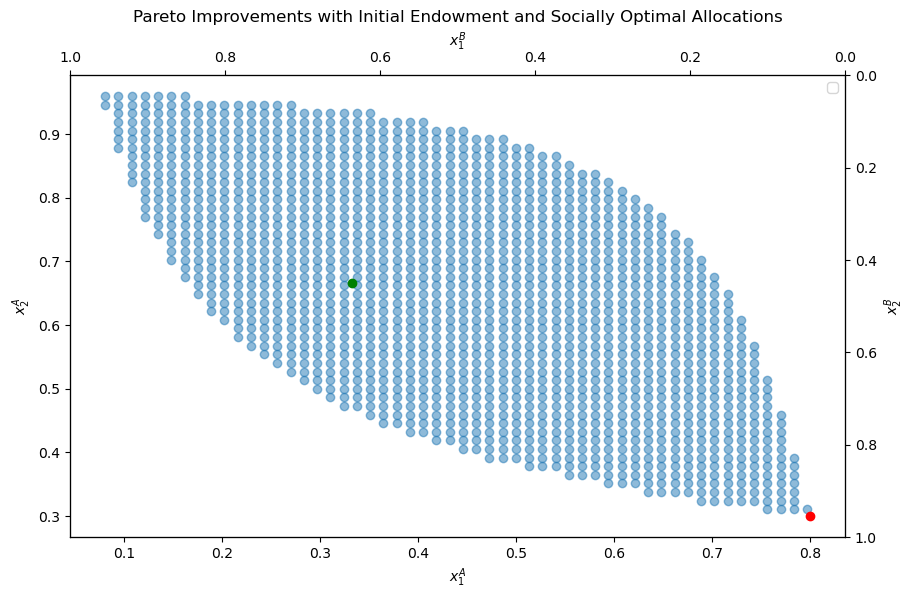

In [39]:
import matplotlib.pyplot as plt #REMOVE THIS WHEN PALCING IN THE GENERAL NOTEBOOK, AS IT HAS ALREADY BEEN DONE
par = model.par #REMOVE THIS WHEN PALCING IN THE GENERAL NOTEBOOK, AS IT HAS ALREADY BEEN DONE


plt.figure(figsize=(10, 6))

# Scatter plot for pareto improvements 
plt.scatter(pareto_imp_x1A, pareto_imp_x2A, alpha=0.5, label="Pareto Improvements")

# Plot initial endowment and optimal allocation
plt.scatter(par.w1A,par.w2A, color='red', label='Initial Endowment', zorder=5)
plt.scatter(social_opt_x1A, social_opt_x2A, color='green', label='Socially Optimal Allocation', zorder=5)

# Setting labels for A's allocations
plt.xlabel('$x_1^A$')
plt.ylabel('$x_2^A$')

# Add second x-axis for B's allocations
ax_B1 = plt.twiny()
ax_B1.set_xlabel('$x_1^B$', color='black')
ax_B1.set_xlim([1, 0])  # Invert axis to match the perspective for B
ax_B1.tick_params(axis='x', colors='black')

# Add second y-axis for B's allocations
ax_B2 = plt.twinx()
ax_B2.set_ylabel('$x_2^B$', color='black')
ax_B2.set_ylim([1, 0])  # Invert axis to match the perspective for B
ax_B2.tick_params(axis='y', colors='black')

plt.title('Pareto Improvements with Initial Endowment and Socially Optimal Allocations')
plt.legend()
plt.show()


In [6]:
P1 = np.linspace(0.5, 2.5, 75)  # Creates 75 prices from 0.5 to 2.5


# Objective function to maximize A's utility by adjusting p1
def objective_A(p1, return_negative=True):
    x1_A, x2_A = model.demand_A(p1,p2=1)
    utility_A = model.utility_A(x1A,x2A)
    if return_negative:
        return -utility_A  # We return the negative utility because we are minimizing
    return utility_A

# For 4a: Optimize over a discrete set of p1 values
def optimize_4a():
    utilities = np.array([objective_A(p1) for p1 in P1])
    max_index = np.argmax(utilities)
    return P1[max_index], -utilities[max_index]

# For 4b: Continuous optimization for any positive p1
def optimize_4b():
    bounds = [(0.01, None)]  # p1 > 0, avoiding division by zero
    result = optimize.minimize(objective_A, x0=[1], bounds=bounds)
    if result.success:
        return result.x[0], -result.fun
    else:
        return None, None

# Execute optimizations for 4a and 4b
optimal_p1_4a, max_utility_4a = optimize_4a()
print(f"4a: Optimal p1 = {optimal_p1_4a}, Maximum Utility for A = {max_utility_4a}")

optimal_p1_4b, max_utility_4b = optimize_4b()
if optimal_p1_4b is not None:
    print(f"4b: Optimal p1 = {optimal_p1_4b}, Maximum Utility for A = {max_utility_4b}")
else:
    print("Optimization for 4b was unsuccessful.")

NameError: name 'x1A' is not defined